<a href="https://colab.research.google.com/github/ntienvu/KnownOptimum_BO/blob/master/run_all_benchmark_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/ntienvu/KnownOptimum_BO #--force-reinstall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scipy-1.9.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (43.4 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.23.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.2
    Uninstalling numpy-1.24.2:
      Successfully uninstalled numpy-1.24.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-1.1.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (31.2 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.1
    Uninstalling scikit-learn-1.2.1:
      Successfully uninstalled scikit-learn-1.2.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ntienvu/KnownOptimum_BO to /tmp/pip-req-build-ed_67ga1
  Running command git clone --filter=blob:none --quiet https://github.com/ntienvu/KnownOptimum_BO /tmp/pip-req-build-ed_67ga1
  Resolved https://github.com/ntienvu/KnownOptimum_BO to commit f51f9528cbe819057b9f8b987298a1bcf523398a
  Preparing metadata (setup.py) ... done


# Demo on benchmark functions

In [2]:
import matplotlib.pyplot as plt
from bayes_opt import BayesOpt_KnownOptimumValue,BayesOpt
import numpy as np
from bayes_opt import vis_ERM,functions,utilities
import warnings
from tqdm.notebook import tqdm


warnings.filterwarnings("ignore")


In [3]:
# Check numpy and scipy version

import scipy
import sklearn
import sys
print('Python version: ', sys.version)

print("sklearn.__version__",sklearn.__version__)
print("np.__version__",np.__version__)
print("scipy.__version__",scipy.__version__)


sklearn.__version__ 1.1.2
np.__version__ 1.24.2
scipy.__version__ 1.9.1
Python version:  3.8.10 (default, Nov 14 2022, 12:59:47) 
[GCC 9.4.0]


# Select a function to run the experiment

In [5]:
#myfunction=functions.branin()
#myfunction=functions.hartman_3d()
#myfunction=functions.ackley(input_dim=5)
myfunction=functions.alpine1(input_dim=5)
#myfunction=functions.gSobol(a=np.array([1,1,1,1,1]))
#myfunction=functions.hartman_6d()

print("func:",myfunction.name)


func: alpine1


# Select a list of acquisition functions to compare


In [6]:
acq_type_list=[]

temp={}
temp['name']='erm' # expected regret minimization
temp['IsTGP']=1 # recommended to use tgp for ERM
acq_type_list.append(temp)

temp={}
temp['name']='cbm' # confidence bound minimization
temp['IsTGP']=1 # recommended to use tgp for CBM
acq_type_list.append(temp)

temp={}
temp['name']='mes_fstar' # MES+f*
temp['IsTGP']=0 # we can try 'tgp'
acq_type_list.append(temp)

temp={}
temp['name']='ucb' # GP-UCB
temp['IsTGP']=0 # we can try 'tgp' by setting it =1
#acq_type_list.append(temp)

temp={}
temp['name']='ei' # EI
temp['IsTGP']=0 # we can try 'tgp' by setting it =1
acq_type_list.append(temp)

temp={}
temp['name']='random' # random
temp['IsTGP']=0 # we can try 'tgp' by setting it =1
acq_type_list.append(temp)

# Run the experiments across different acquisition functions

---



==================acquisition type {'name': 'erm', 'IsTGP': 1}


  0%|          | 0/10 [00:00<?, ?it/s]

[ -8.61413684 -14.39890465 -16.93622744 -22.92938243 -11.70222065
 -13.01072522 -13.49332877 -12.68894879  -8.78322918 -13.00487336
 -15.15409797 -13.9441531  -17.24393558 -20.47452169  -6.75988881
  -8.12591419 -14.469198    -8.34802028 -13.17659066  -9.54663588
 -14.77856096 -15.09768808 -12.84012187 -14.42964851  -6.34493034
 -22.88585803 -21.32919125 -11.02997826 -11.1948553   -6.31753501
  -8.96602305 -10.70872185 -16.73561512 -12.39584019  -8.99239308
 -23.31767466 -24.65298135 -19.4515892  -12.99705337 -10.49186809
 -11.30925785 -10.4499687   -5.92525918 -20.47646113  -4.60174982
  -9.80967088  -3.9548899  -17.52915987 -13.30641432  -6.36528729
 -11.13984317 -10.3837462  -16.30332494 -17.68852538 -12.06990766
 -19.42259038  -7.85501323 -11.69935174 -10.55628399 -18.66954939
  -8.93266315  -6.48732258  -9.01728061 -20.24076348  -5.3943281 ]
#repeat=0 Best Found Value=3.955
[-19.20197107 -10.03460518 -15.00388297 -10.26837915 -14.92700071
 -25.71779153 -14.40445654 -14.58134142 -2

  0%|          | 0/10 [00:00<?, ?it/s]

[ -8.61413684 -14.39890465 -16.93622744 -22.92938243 -11.70222065
 -13.01072522 -13.49332877 -12.68894879  -8.78322918 -13.00487336
 -15.15409797 -13.9441531  -17.24393558 -20.47452169  -6.75988881
  -8.12589172 -14.02229067 -17.06366022 -14.47739041  -4.21809969
  -8.37231747 -13.58548022 -14.76406556 -10.09434643 -23.31351512
 -15.13640259 -12.94975419 -20.62274251 -11.73380522 -20.60609699
  -3.86612811  -5.29969534  -4.44810703 -15.90482663 -16.61475293
 -13.03876899 -10.13104679  -5.39885837  -9.18386451 -10.97736198
 -12.87845088  -9.80889337 -12.28548521 -10.18451223 -10.94819995
  -9.62335668 -11.65518878  -6.36528814  -5.58461719 -14.46102725
 -12.25940994 -16.13329941  -8.42877746  -8.37389981  -9.18802496
 -17.37111254 -23.78706268 -12.34456588  -9.79301617  -7.43074547
  -6.37318149 -20.67224437 -13.70980871 -10.1174102  -16.85623995]
#repeat=0 Best Found Value=3.866
[-19.20197107 -10.03460518 -15.00388297 -10.26837915 -14.92700071
 -25.71779153 -14.40445654 -14.58134142 -2

  0%|          | 0/10 [00:00<?, ?it/s]

[ -8.61413684 -14.39890465 -16.93622744 -22.92938243 -11.70222065
 -13.01072522 -13.49332877 -12.68894879  -8.78322918 -13.00487336
 -15.15409797 -13.9441531  -17.24393558 -20.47452169  -6.75988881
 -17.93338823 -12.24529342  -9.57033573 -12.04159194 -17.13281121
 -22.55010295 -25.54670277 -12.58826275 -27.0780441  -27.34125779
 -26.3403565  -28.20105554 -28.20105554 -16.54770277 -13.12934638
  -8.87308999 -22.77276761 -24.20105554 -26.83321875 -21.0064212
 -25.39222661 -25.6715392  -27.91135322 -28.60974529 -15.33787734
 -19.48544031 -26.20105554 -28.20105554 -24.20105554 -21.52302222
  -7.69853538 -20.5340818  -13.87665821 -15.44386677 -16.35311784
 -23.23115437 -12.76344881 -18.48237369 -26.20105554 -11.43386692
 -21.90009677 -29.00440207 -11.9994046  -16.69234259 -12.00781621
 -12.92470625 -15.91884881 -19.24854104 -16.93765968 -20.86285586]
#repeat=0 Best Found Value=6.760
[-19.20197107 -10.03460518 -15.00388297 -10.26837915 -14.92700071
 -25.71779153 -14.40445654 -14.58134142 -20

  0%|          | 0/10 [00:00<?, ?it/s]

[ -8.61413684 -14.39890465 -16.93622744 -22.92938243 -11.70222065
 -13.01072522 -13.49332877 -12.68894879  -8.78322918 -13.00487336
 -15.15409797 -13.9441531  -17.24393558 -20.47452169  -6.75988881
  -8.38263349 -18.07433573 -10.33021652  -7.94480872 -10.11982266
 -15.20903053 -10.30147464  -7.4305029   -4.90242001 -11.41925444
  -9.60022474  -5.91435671  -5.76100014  -8.13365758  -3.86669377
  -7.03327459 -15.35751807 -13.00772527 -23.56090874  -7.61963558
 -16.79125593  -8.05191293  -1.82501356  -5.65794897  -3.62083682
 -16.89967847 -23.33726977 -22.81342343 -20.59759472 -11.77076535
  -5.82633556 -11.90006669 -14.44234744  -7.88851858  -5.68873515
 -11.25773986 -18.45723122 -11.48228591  -3.93977313  -4.41895265
  -9.37970139 -10.74875915  -6.14504052 -15.51076388  -6.6728055
  -6.29194752 -21.85932023 -10.09509401 -10.16566018  -5.98379044]
#repeat=0 Best Found Value=1.825
[-19.20197107 -10.03460518 -15.00388297 -10.26837915 -14.92700071
 -25.71779153 -14.40445654 -14.58134142 -20

  0%|          | 0/10 [00:00<?, ?it/s]

[[ -8.61413684]
 [-14.39890465]
 [-16.93622744]
 [-22.92938243]
 [-11.70222065]
 [-13.01072522]
 [-13.49332877]
 [-12.68894879]
 [ -8.78322918]
 [-13.00487336]
 [-15.15409797]
 [-13.9441531 ]
 [-17.24393558]
 [-20.47452169]
 [ -6.75988881]
 [-22.41250702]
 [-11.97156115]
 [-21.35056979]
 [-15.8666972 ]
 [-12.94302032]
 [-18.21386691]
 [-13.69623601]
 [-12.45148209]
 [-21.9136642 ]
 [ -9.99848538]
 [-12.32467233]
 [-13.66365832]
 [ -5.9317582 ]
 [-19.77086139]
 [-25.7516467 ]
 [-21.85576917]
 [-13.73903361]
 [-14.14893129]
 [-16.17101131]
 [-10.63298375]
 [-15.15289763]
 [-17.38582193]
 [-11.10197053]
 [-15.28314766]
 [-15.03300611]
 [ -8.16149044]
 [-16.25905064]
 [-14.31328141]
 [-12.29845134]
 [-16.04064174]
 [-18.82930416]
 [-13.61387053]
 [ -9.60812553]
 [-23.04526868]
 [ -7.82704958]
 [-23.26840482]
 [-16.00031122]
 [-23.32757455]
 [-13.80180466]
 [-16.25375918]
 [-21.04355114]
 [-14.95425341]
 [ -6.55752558]
 [ -9.18351573]
 [-21.59796356]
 [-21.01943675]
 [-22.12773381]
 [-21.70

Text(0.5, 1.0, 'alpine1 D=5')

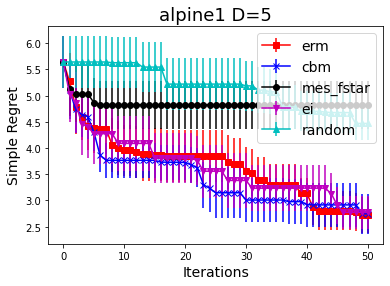

In [7]:
fig=plt.figure()

color_list=['r','b','k','m','c','g']
marker_list=['s','x','o','v','^','>']

for idx, acq_type in enumerate(acq_type_list):

    print("==================acquisition type",acq_type)
    
    IsTGP=acq_type['IsTGP']
    acq_name=acq_type['name']
    
    nRepeat=10
    
    ybest=[0]*nRepeat
    ElapseTime=[0]*nRepeat
    OptTime=[0]*nRepeat
    bo=[0]*nRepeat
   
    for ii in tqdm(range(nRepeat)): # run over multiple repetitions
        
        if 'fstar' in acq_name or acq_name == 'erm' or acq_name == 'cbm':
            bo[ii]=BayesOpt_KnownOptimumValue(myfunction.func,myfunction.bounds,\
                                myfunction.fstar,acq_name,IsTGP,verbose=0)
        else:
            bo[ii]=BayesOpt(myfunction.func,myfunction.bounds,acq_name,verbose=0)
  
        if acq_name =='random': # we generate random points without running BO
            ybest[ii],ElapseTime[ii]=utilities.run_experiment(bo[ii],
                 n_init=13*myfunction.input_dim,NN=0,runid=ii)   
        else:
            ybest[ii],ElapseTime[ii]=utilities.run_experiment(bo[ii],
                                        n_init=3*myfunction.input_dim,\
                                        NN=10*myfunction.input_dim,runid=ii)   
                                       
        OptTime[ii]=bo[ii].time_opt # record the computational time
        print(ybest[ii])
        print("#repeat={} Best Found Value={:.3f}".format(ii,myfunction.ismax*np.max(ybest[ii])))                                              

    # record the result and save to pickle files================================
    # Score={}
    # Score["ybest"]=ybest
    # Score["ElapseTime"]=ElapseTime
    # Score["OptTime"]=OptTime
    # utilities.print_result_sequential(bo,myfunction,Score,acq_type) 
    
    # plot the result ==========================================================
    y_best_sofar=[0]*len(bo)
    for uu,mybo in enumerate(bo):
        y_best_sofar[uu]=[ (myfunction.fstar - np.max(mybo.Y_ori[:ii+1]) ) for ii in range(len(mybo.Y_ori))]
        y_best_sofar[uu]=y_best_sofar[uu][3*myfunction.input_dim-1:] # remove the random phase for plotting purpose
        
    y_best_sofar=np.asarray(y_best_sofar)
    xaxis=range(y_best_sofar.shape[1])
    plt.errorbar(xaxis,np.mean(y_best_sofar,axis=0), np.std(y_best_sofar,axis=0)/np.sqrt(nRepeat),
                 label=acq_type['name'],color=color_list[idx],marker=marker_list[idx])
    
plt.ylabel("Simple Regret",fontsize=14)
plt.xlabel("Iterations",fontsize=14)
plt.legend(prop={'size': 14})
strTitle="{:s} D={:d}".format(myfunction.name,myfunction.input_dim)
plt.title(strTitle,fontsize=18)
